In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import warnings
warnings.filterwarnings('ignore')


In [6]:
import numpy as np
import pandas as pd

In [7]:
# make sure files are in same directory
train_dataset=pd.read_csv("train-1574429526318.csv",na_values=['N/A','NaN','?','Na'])
# importing the data

Exploratory Data Analysis

In [8]:
train_dataset.shape # shape of the dataset

# so we have 9806 rows and 22 columns

(9806, 22)

In [9]:
train_dataset.dtypes  # type of data wrt the features

CustomerID                         int64
Customer.Lifetime.Value          float64
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                           float64
Location.Geo                      object
Location.Code                     object
Marital.Status                    object
Monthly.Premium.Auto             float64
Months.Since.Last.Claim            int64
Months.Since.Policy.Inception      int64
Number.of.Open.Complaints        float64
Number.of.Policies               float64
Policy.Type                       object
Policy                            object
Renew.Offer.Type                  object
Sales.Channel                     object
Total.Claim.Amount               float64
Vehicle.Class                     object
Vehicle.Size                     float64
dtype: object

In [10]:
# Descriptive statistics

train_dataset.describe() # description of the numerical variables

,CustomerID,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size
count,9806.000000,9806.000000,9688.000000,9012.000000,9806.000000,9806.000000,8988.000000,9685.000000,9806.000000,9680.000000
mean,5778.381807,7998.047015,37511.054604,93.340657,15.143993,48.165001,0.379172,2.960351,438.266734,2.089773
std,3343.286093,6848.055899,30292.974468,34.417763,10.004327,27.963630,0.896427,2.389801,293.502301,0.538524
min,1.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2879.250000,4013.949039,0.000000,68.750000,6.000000,24.000000,0.000000,1.000000,280.352767,2.000000
50%,5783.000000,5780.182197,33767.500000,83.000000,14.000000,48.000000,0.000000,2.000000,384.007015,2.000000
75%,8678.750000,8960.280213,62018.000000,109.000000,23.000000,71.750000,0.000000,4.000000,553.540973,2.000000
max,11573.000000,83325.381190,99981.000000,297.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,3.000000


customer id is a unique column we need to drop it.

customer life time value,Total.Claim.Amount have outliers.

Income,Monthly premium auto,no of open complaints,no of polices,vehicle size has null values.

Months.Since.Last.Claim,Months.Since.Policy.Inception,	Number.of.Open.Complaints,Number.of.Policies,Vehicle.Size
 is categorical.

In [11]:
train_dataset.describe(include='O') # description of categorical varaibles

,Coverage,Education,EmploymentStatus,Gender,Location.Geo,Location.Code,Marital.Status,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class
count,8881,9677,9688,9677,9806,9687,9677,8915,9685,9678,9678,9680
unique,3,5,5,2,2840,3,3,3,9,4,4,6
top,Basic,Bachelor,Employed,F,"NA,NA",Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car
freq,5361,2934,6020,4985,119,6204,5643,6620,3637,3975,3670,4869


Coverage,Education,EmploymentStatus,Gender,Marital.Status,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class all are having null values.

Location.Geo can cause high dimensionality so better to drop it.



# Data Visualizations and Preprocessing

#### Dropping Unwanted columns

In [12]:
train_dataset.columns

Index(['CustomerID', 'Customer.Lifetime.Value', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location.Geo', 'Location.Code',
       'Marital.Status', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [13]:
def drop_unwanted(x):
    x.drop(['CustomerID','Location.Geo'],axis=1,inplace=True)

In [14]:
drop_unwanted(train_dataset)

In [15]:
train_dataset.columns

Index(['Customer.Lifetime.Value', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Income', 'Location.Code', 'Marital.Status',
       'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

#### Type Conversion

In [16]:
def type_conversion(x):
    x['Months.Since.Last.Claim']=x["Months.Since.Last.Claim"].astype("category")
    x["Months.Since.Policy.Inception"]=x["Months.Since.Policy.Inception"].astype("category")
    x["Number.of.Open.Complaints"]=x["Number.of.Open.Complaints"].astype("category")
    x["Number.of.Policies"]=x["Number.of.Policies"].astype("category")
    x["Vehicle.Size"]=x["Vehicle.Size"].astype("category")


In [17]:
type_conversion(train_dataset)

#### Let's split the data to train and test

##### as the test data is unknown to us it is better to preprocess differently the train and test data to understand the model how it is working with the test data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x=train_dataset.drop(['Customer.Lifetime.Value'],axis=1)
y=train_dataset[['Customer.Lifetime.Value']]

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=4306)

##### Lets see if there are any null values or not

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

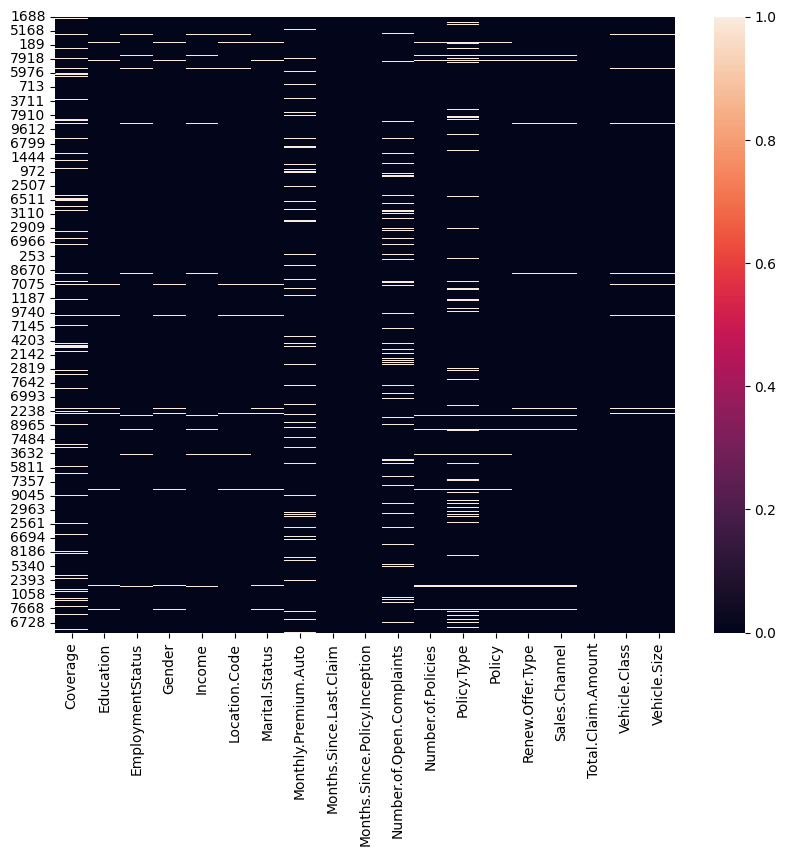

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(x_train.isna())

#### lets fill the missing values

##### as there are outliers in our numerical data it is better to fill the missing values with median.

##### filling the missing values with the mode to the categorical data.

In [23]:
# lets fill the train data numerical columns

In [24]:
numerical_cols=x_train.describe().columns
categorical_cols=x_train.describe(include=['object','category']).columns

In [25]:
numerical_cols

Index(['Income', 'Monthly.Premium.Auto', 'Total.Claim.Amount'], dtype='object')

In [26]:
# using simple imputer

from sklearn.impute import SimpleImputer

In [27]:
si=SimpleImputer(strategy='median')
x_train[numerical_cols]=si.fit_transform(x_train[numerical_cols])

In [28]:
# lets fill the train data categorical variables

In [29]:
categorical_cols

Index(['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location.Code',
       'Marital.Status', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [30]:
sic=SimpleImputer(strategy='most_frequent')
x_train[categorical_cols]=sic.fit_transform(x_train[categorical_cols])

<Axes: >

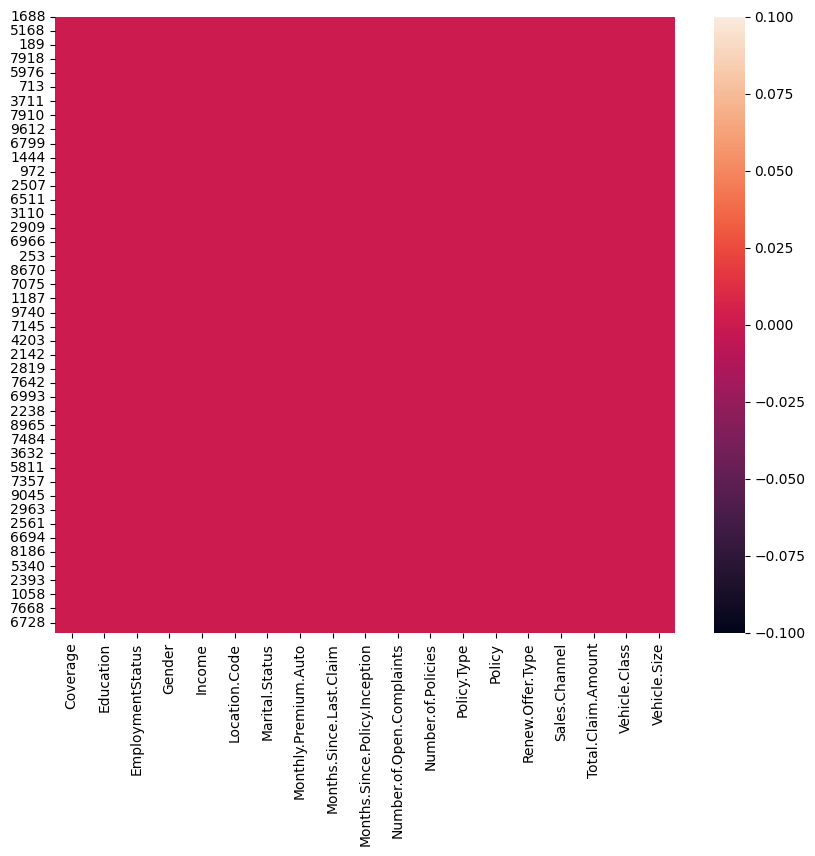

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(x_train.isna())
# no null values

In [32]:
# lets fill the y_train data which is a numerical column

In [33]:
sii=SimpleImputer(strategy='median')
y_train[['Customer.Lifetime.Value']]=sii.fit_transform(y_train[['Customer.Lifetime.Value']])

In [34]:
y_train[['Customer.Lifetime.Value']].isna().sum()

Customer.Lifetime.Value    0
dtype: int64

#### Lets see if there are outliers or not using boxplot

In [35]:
numerical_cols

Index(['Income', 'Monthly.Premium.Auto', 'Total.Claim.Amount'], dtype='object')

In [36]:
# outliers can only be seen in numerical colums

In [37]:
def whiskers(x):
    IQR1=np.quantile(x,0.75)-np.quantile(x,0.25)
    print("IQR :",IQR1)
    upper_whishker=(np.quantile(x,0.75)+(1.5)*IQR1)
    print("upper_whishker:",upper_whishker)
    lower_whishker=(np.quantile(x,0.25)-(1.5)*IQR1)
    print("lower_whishker :",lower_whishker)
    print("total number of data points above upper whishker :",(x>upper_whishker).sum())
    print("total number of data points below the lower whishker ",(x<lower_whishker).sum())

<Axes: >

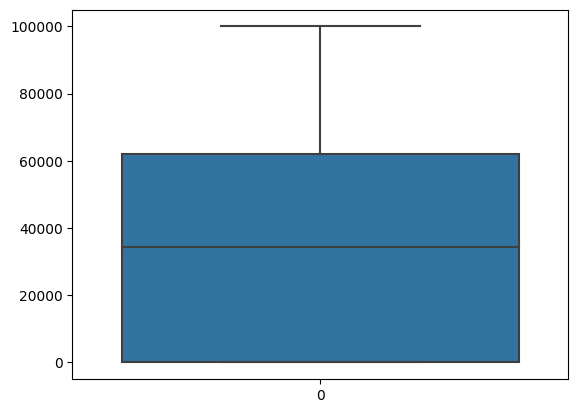

In [38]:
sns.boxplot(x_train['Income'])
# have outlers or influential point

In [39]:
whiskers(x_train['Income'])

IQR : 61994.0
upper_whishker: 154985.0
lower_whishker : -92991.0
total number of data points above upper whishker : 0
total number of data points below the lower whishker  0


<Axes: >

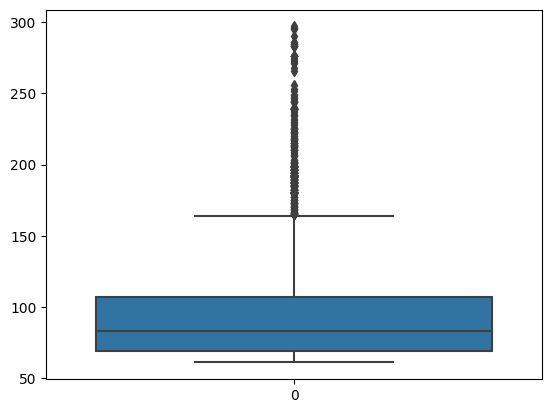

In [40]:
sns.boxplot(x_train['Monthly.Premium.Auto'])
# don't have any outlers or influential point

In [41]:
whiskers(x_train['Monthly.Premium.Auto'])

IQR : 38.0
upper_whishker: 164.0
lower_whishker : 12.0
total number of data points above upper whishker : 326
total number of data points below the lower whishker  0


<Axes: >

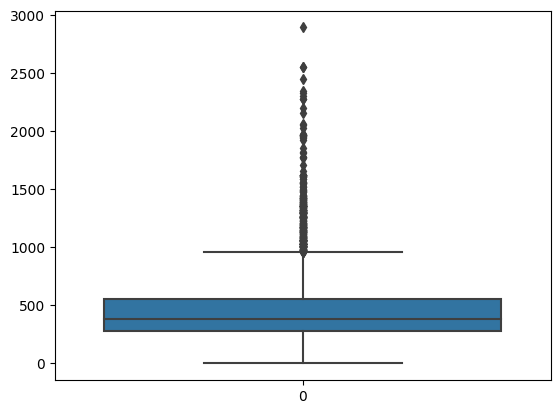

In [42]:
sns.boxplot(x_train['Total.Claim.Amount'])
# have any outliers or influential point

In [43]:
whiskers(x_train['Total.Claim.Amount'])

IQR : 270.75037575
upper_whishker: 958.125563625
lower_whishker : -124.87593937499997
total number of data points above upper whishker : 348
total number of data points below the lower whishker  0


In [44]:
# All are related to the income so may be they are not outliers.

### Standardization

##### to make our model fast during the training we need to do standardization

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler=StandardScaler()
x_train[numerical_cols]=scaler.fit_transform(x_train[numerical_cols])

In [47]:
x_train[numerical_cols].head()

,Income,Monthly.Premium.Auto,Total.Claim.Amount
1688,-1.247703,-0.284805,-0.133205
5495,0.414690,1.158925,0.651813
550,-0.173605,6.151825,4.539874
7732,1.940515,0.737837,0.396261
6304,0.393430,0.677682,0.391128


In [48]:
scaler_y=StandardScaler()
y_train[['Customer.Lifetime.Value']]=scaler_y.fit_transform(y_train[['Customer.Lifetime.Value']])

In [49]:
# y_train[['Customer.Lifetime.Value']] = scaler_y.inverse_transform(y_train[['Customer.Lifetime.Value']])

# to detransform it we can use this code

#### Dummification

##### as our system can't process the cateorical variables we have to convert them into numericals

##### the process of converting the categorical variables are called dummification

In [50]:
# dummification can be done for categorical variables
# categorical variables are three types

# nominal - variables having data points which don't have any order (no of childern in a family - 2,1,5)
# ordinal - variables having data points which have a specific order (rating - 5,4,3,2,1)

# nominal can be handle using OneHotEncoder 
# ordinal can be handle using  ordinal encoder
# if our target is categorical then we have to use label encoder.

# or  we can also do one hot encoder for every categorical varible.
# if we had very few categories in a feature we can go with one hot encoder. (becasue this doesnot causes the curse of dimensionality )
# if we had very high categories in a feature we can go with their respective method.

In [51]:
categorical_cols

Index(['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location.Code',
       'Marital.Status', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [52]:
x_train[categorical_cols].describe()

,Coverage,Education,EmploymentStatus,Gender,Location.Code,Marital.Status,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class,Vehicle.Size
count,6864,6864,6864,6864,6864,6864,6864,6864,6864.0,6864.0,6864,6864,6864,6864,6864,6864.0
unique,3,5,5,2,3,3,36,100,6.0,9.0,3,9,4,4,6,3.0
top,Basic,Bachelor,Employed,F,Suburban,Married,3,61,0.0,1.0,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,2.0
freq,4380,2176,4304,3538,4430,4059,281,111,5564.0,2494.0,5256,2649,2862,2662,3487,4814.0


In [53]:
onehot_cols=['Coverage','Education','EmploymentStatus','Gender','Location.Code','Marital.Status','Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Vehicle.Class','Vehicle.Size']
ordinal_cols=['Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies']

In [54]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
oe=OneHotEncoder(handle_unknown='ignore',drop='if_binary')
one_hot_data=pd.DataFrame(oe.fit_transform(x_train[['Coverage','Education','EmploymentStatus','Gender','Location.Code','Marital.Status','Policy.Type', 'Policy', 'Renew.Offer.Type',
'Sales.Channel', 'Vehicle.Class','Vehicle.Size']]).toarray(),columns=oe.get_feature_names_out())

In [56]:
one_hot_data.columns

Index(['Coverage_Basic', 'Coverage_Extended', 'Coverage_Premium',
       'Education_Bachelor', 'Education_College', 'Education_Doctor',
       'Education_High School or Below', 'Education_Master',
       'EmploymentStatus_Disabled', 'EmploymentStatus_Employed',
       'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
       'EmploymentStatus_Unemployed', 'Gender_M', 'Location.Code_Rural',
       'Location.Code_Suburban', 'Location.Code_Urban',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Policy.Type_Corporate Auto',
       'Policy.Type_Personal Auto', 'Policy.Type_Special Auto',
       'Policy_Corporate L1', 'Policy_Corporate L2', 'Policy_Corporate L3',
       'Policy_Personal L1', 'Policy_Personal L2', 'Policy_Personal L3',
       'Policy_Special L1', 'Policy_Special L2', 'Policy_Special L3',
       'Renew.Offer.Type_Offer1', 'Renew.Offer.Type_Offer2',
       'Renew.Offer.Type_Offer3', 'Renew.Offer.Type_Offer4',
       'Sales

In [57]:
# lets do ordinal encoder

from sklearn.preprocessing import OrdinalEncoder

In [58]:
x_train[ordinal_cols].head()

,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies
1688,20,32,0.0,1.0
5495,0,37,0.0,1.0
550,24,68,0.0,1.0
7732,33,81,0.0,6.0
6304,1,73,0.0,1.0


In [59]:
ordinal=OrdinalEncoder()
x_train[ordinal_cols]=ordinal.fit_transform(x_train[ordinal_cols])

In [60]:
x_train.shape

(6864, 19)

In [61]:
x_train.head()

,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
1688,Extended,Master,Unemployed,F,-1.247703,Suburban,Married,-0.284805,20.0,32.0,0.0,0.0,Personal Auto,Personal L1,Offer2,Call Center,-0.133205,Four-Door Car,2.0
5495,Extended,High School or Below,Employed,M,0.414690,Suburban,Married,1.158925,0.0,37.0,0.0,0.0,Personal Auto,Personal L2,Offer1,Branch,0.651813,SUV,2.0
550,Premium,College,Employed,M,-0.173605,Suburban,Married,6.151825,24.0,68.0,0.0,0.0,Personal Auto,Personal L1,Offer1,Agent,4.539874,Luxury Car,2.0
7732,Premium,High School or Below,Employed,F,1.940515,Urban,Married,0.737837,33.0,81.0,0.0,5.0,Personal Auto,Personal L1,Offer1,Call Center,0.396261,Four-Door Car,2.0
6304,Basic,High School or Below,Employed,F,0.393430,Suburban,Divorced,0.677682,1.0,73.0,0.0,0.0,Personal Auto,Personal L2,Offer3,Web,0.391128,SUV,1.0


In [62]:
one_hot_data.shape

(6864, 49)

In [63]:
one_hot_data.head()

,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,...,Sales.Channel_Web,Vehicle.Class_Four-Door Car,Vehicle.Class_Luxury Car,Vehicle.Class_Luxury SUV,Vehicle.Class_SUV,Vehicle.Class_Sports Car,Vehicle.Class_Two-Door Car,Vehicle.Size_1.0,Vehicle.Size_2.0,Vehicle.Size_3.0
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [64]:
one_hot_data.set_index(x_train.index,inplace=True)

In [65]:
# lets concat the train data with one hot dummified data

x_train_dummified=pd.concat([x_train,one_hot_data],axis=1)

In [66]:
x_train_dummified.shape

(6864, 68)

In [67]:
pd.set_option("display.max_columns",None)

In [68]:
x_train_dummified.head()

,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location.Code_Rural,Location.Code_Suburban,Location.Code_Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Policy.Type_Corporate Auto,Policy.Type_Personal Auto,Policy.Type_Special Auto,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew.Offer.Type_Offer1,Renew.Offer.Type_Offer2,Renew.Offer.Type_Offer3,Renew.Offer.Type_Offer4,Sales.Channel_Agent,Sales.Channel_Branch,Sales.Channel_Call Center,Sales.Channel_Web,Vehicle.Class_Four-Door Car,Vehicle.Class_Luxury Car,Vehicle.Class_Luxury SUV,Vehicle.Class_SUV,Vehicle.Class_Sports Car,Vehicle.Class_Two-Door Car,Vehicle.Size_1.0,Vehicle.Size_2.0,Vehicle.Size_3.0
1688,Extended,Master,Unemployed,F,-1.247703,Suburban,Married,-0.284805,20.0,32.0,0.0,0.0,Personal Auto,Personal L1,Offer2,Call Center,-0.133205,Four-Door Car,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5495,Extended,High School or Below,Employed,M,0.414690,Suburban,Married,1.158925,0.0,37.0,0.0,0.0,Personal Auto,Personal L2,Offer1,Branch,0.651813,SUV,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
550,Premium,College,Employed,M,-0.173605,Suburban,Married,6.151825,24.0,68.0,0.0,0.0,Personal Auto,Personal L1,Offer1,Agent,4.539874,Luxury Car,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7732,Premium,High School or Below,Employed,F,1.940515,Urban,Married,0.737837,33.0,81.0,0.0,5.0,Personal Auto,Personal L1,Offer1,Call Center,0.396261,Four-Door Car,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6304,Basic,High School or Below,Employed,F,0.393430,Suburban,Divorced,0.677682,1.0,73.0,0.0,0.0,Personal Auto,Personal L2,Offer3,Web,0.391128,SUV,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [69]:
# drop the dummified columns

x_train_dummified.drop(['Coverage','Education','EmploymentStatus','Gender','Location.Code','Marital.Status','Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Vehicle.Class','Vehicle.Size'],axis=1,inplace=True)

In [70]:
# we have to preprocess the test data also

In [71]:
x_test.columns

Index(['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Income',
       'Location.Code', 'Marital.Status', 'Monthly.Premium.Auto',
       'Months.Since.Last.Claim', 'Months.Since.Policy.Inception',
       'Number.of.Open.Complaints', 'Number.of.Policies', 'Policy.Type',
       'Policy', 'Renew.Offer.Type', 'Sales.Channel', 'Total.Claim.Amount',
       'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [72]:
type_conversion(x_test)

In [73]:
x_test[numerical_cols]=si.transform(x_test[numerical_cols])

In [74]:
y_test[['Customer.Lifetime.Value']]=sii.transform(y_test[['Customer.Lifetime.Value']])

In [75]:
x_test[categorical_cols]=sic.transform(x_test[categorical_cols])

In [76]:
x_test[numerical_cols]=scaler.transform(x_test[numerical_cols])

In [77]:
y_test[['Customer.Lifetime.Value']]=scaler_y.transform(y_test[['Customer.Lifetime.Value']])

In [78]:
oe_test_data=pd.DataFrame(oe.transform(x_test[['Coverage','Education','EmploymentStatus','Gender','Location.Code','Marital.Status','Policy.Type', 'Policy', 'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class','Vehicle.Size']]).toarray(),columns=oe.get_feature_names_out())

In [79]:
oe_test_data.set_index(x_test.index,inplace=True)

In [80]:
x_test[ordinal_cols]=ordinal.transform(x_test[ordinal_cols])

In [81]:
x_test_dummified=pd.concat([x_test,oe_test_data],axis=1)

In [82]:
x_test_dummified.drop(['Coverage','Education','EmploymentStatus','Gender','Location.Code','Marital.Status','Policy.Type', 'Policy', 'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class','Vehicle.Size'],axis=1,inplace=True)

In [83]:
# end of data preprocessing

end of data preprocessing

In [84]:
# lets start model building with out data x_train_dummified,y_train

## Linear Regression

In [85]:
# Linear regression

from sklearn.linear_model import LinearRegression

In [86]:
lr=LinearRegression()
lr.fit(x_train_dummified,y_train)

LinearRegression()

In [87]:
from sklearn.metrics import r2_score,mean_squared_error

In [88]:
train_preds_lr=lr.predict(x_train_dummified)
print("r2_score for linear regression:",r2_score(y_train[['Customer.Lifetime.Value']],train_preds_lr))
print("root_mean_squared_error for linear regression :",mean_squared_error(y_train[['Customer.Lifetime.Value']],train_preds_lr,squared=True))

r2_score for linear regression: 0.17296624081010736
root_mean_squared_error for linear regression : 0.8270337591898929


In [89]:
test_preds_lr=lr.predict(x_test_dummified)

In [90]:
print(r2_score(y_test[['Customer.Lifetime.Value']],test_preds_lr))

0.1484728778716169


In [91]:
print(mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_lr))

0.8202997664846422


In [92]:
# r2_score for train data is 0.17
# r2_score for test data is 0.14

# which says that our model does not explain any of the variability in the dependent variable.

## Lasso Regression

In [93]:
# lasso
from sklearn.linear_model import Lasso

In [94]:
la=Lasso()
la.fit(x_train_dummified,y_train)

train_preds_la=la.predict(x_train_dummified)
test_preds_la=la.predict(x_test_dummified)

print("r2_score of Lasso regression for train data:",r2_score(y_train[['Customer.Lifetime.Value']],train_preds_la))
print("root mean squared error of Lasso regression for train data:",mean_squared_error(y_train[['Customer.Lifetime.Value']],train_preds_la))
print("r2_score of Lasso Regression for test data",r2_score(y_test[['Customer.Lifetime.Value']],test_preds_la))
print("root mean squared error of Lasso regression for test data :",mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_la))

r2_score of Lasso regression for train data: 0.0
root mean squared error of Lasso regression for train data: 1.0000000000000002
r2_score of Lasso Regression for test data -4.576938183786794e-05
root mean squared error of Lasso regression for test data : 0.963371911216934


In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
paramas_lasso={'alpha':[0.001,0.5,1,2,5,10,20],'max_iter':[100,200,300,400]}

model_lasso=Lasso()
model_grid_lasso=GridSearchCV(estimator=model_lasso,param_grid=paramas_lasso,scoring='neg_mean_squared_error',cv=5)

model_grid_lasso.fit(x_train_dummified,y_train)
print(model_grid_lasso.best_params_)

print(-model_grid_lasso.best_score_)

train_preds_lasso_gs=model_grid_lasso.predict(x_train_dummified)
test_preds_lasso_gs=model_grid_lasso.predict(x_test_dummified)

print("r2_score for lasso using grid search cv of train data",r2_score(y_train[['Customer.Lifetime.Value']],train_preds_lasso_gs))
print("root mean squared error for lasso using grid search cv of train data",mean_squared_error(y_train[['Customer.Lifetime.Value']],train_preds_lasso_gs))


print("r2_score for lasso using grid search cv of test data",r2_score(y_test[['Customer.Lifetime.Value']],test_preds_lasso_gs))
print("root mean squared error for lasso using grid search cv of test data",mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_lasso_gs))

{'alpha': 0.001, 'max_iter': 100}
0.8379639203091381
r2_score for lasso using grid search cv of train data 0.17210503303396762
root mean squared error for lasso using grid search cv of train data 0.8278949669660326
r2_score for lasso using grid search cv of test data 0.15144253630282678
root mean squared error for lasso using grid search cv of test data 0.8174390119010749


In [97]:
y_train[['Customer.Lifetime.Value']][0:5]

,Customer.Lifetime.Value
1688,-0.703966
5495,-0.392576
550,0.535796
7732,0.216147
6304,-0.498080


In [98]:
# lasso

## r2 -- train -- 0
## r2 -- test  -- -4.57 ?

## rmse -- train -- 1.000
## rmse -- test  -- 0.96

# lasso using grid search cv


## r2 -- train -- 0.17
## r2 -- test  -- 0.15

## rmse -- train -- 0.82
## rmse -- test  -- 0.81

# rmse is close to zero. says good model

## Ridge Regression

In [99]:
# Ridge

from sklearn.linear_model import Ridge

ri=Ridge()
ri.fit(x_train_dummified,y_train)

train_preds_ri=ri.predict(x_train_dummified)
test_preds_ri=ri.predict(x_test_dummified)

print("r2_score for ridge of train data",r2_score(y_train[['Customer.Lifetime.Value']],train_preds_ri))
print("root mean squared error for lasso of train data",mean_squared_error(y_train[['Customer.Lifetime.Value']],train_preds_ri,squared=True))

print("r2_score for ridge of test data",r2_score(y_test[['Customer.Lifetime.Value']],test_preds_ri))
print("root mean squared error for lasso of test data",mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_ri,squared=True))


r2_score for ridge of train data 0.1729643296105403
root mean squared error for lasso of train data 0.8270356703894599
r2_score for ridge of test data 0.14855452782165657
root mean squared error for lasso of test data 0.820221110816243


In [102]:
paramas_ridge={'alpha':[0.001,0.5,1,2,5,10,20],'max_iter':[100,200,300,400]}

model_ridge=Ridge()
model_grid_ridge=GridSearchCV(estimator=model_ridge,param_grid=paramas_ridge,scoring='neg_mean_squared_error',cv=5)

model_grid_ridge.fit(x_train_dummified,y_train)
print(model_grid_ridge.best_params_)

print(-model_grid_ridge.best_score_)

train_preds_ridge_gs=model_grid_ridge.predict(x_train_dummified)
test_preds_ridge_gs=model_grid_ridge.predict(x_test_dummified)


print("r2_score of ridge regression for train data using grid search",r2_score(y_train[['Customer.Lifetime.Value']],train_preds_ridge_gs))
print("root mean squared error of ridge regression for train data using grid search",mean_squared_error(y_train[['Customer.Lifetime.Value']],train_preds_ridge_gs))

print("r2_score of ridge regression for test data using grid search",r2_score(y_test[['Customer.Lifetime.Value']],test_preds_ridge_gs))
print("root mean squared of ridge regression for test data using grid search",mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_ridge_gs))

{'alpha': 20, 'max_iter': 100}
0.8391927713762035
r2_score of ridge regression for train data using grid search 0.1725984756473995
root mean squared error of ridge regression for train data using grid search 0.8274015243526007
r2_score of ridge regression for test data using grid search 0.14938170375606652
root mean squared of ridge regression for test data using grid search 0.8194242692263448


## Elastic-Nets

In [155]:
from sklearn.linear_model import ElasticNet

# Instantiate Elastic Net model with alpha and l1_ratio hyperparameters
model_elastic = ElasticNet(alpha=0.5, l1_ratio=0.5)

# Fit the model to the training data
model_elastic.fit(x_train_dummified,y_train)

train_preds_en=model_elastic.predict(x_train_dummified)
test_preds_en=model_elastic.predict(x_test_dummified)


print("r2_score of Elastic nets for train data",r2_score(y_train[['Customer.Lifetime.Value']],train_preds_en))
print("root mean squared error of Elastic nets for train data",mean_squared_error(y_train[['Customer.Lifetime.Value']],train_preds_en))

print("r2_score of Elastic nets for test data",r2_score(y_test[['Customer.Lifetime.Value']],test_preds_en))
print("root mean squared of Elastic nets for test data",mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_en))

r2_score of Elastic nets for train data 0.07546986073397643
root mean squared error of Elastic nets for train data 0.9245301392660238
r2_score of Elastic nets for test data 0.0730970778846779
root mean squared of Elastic nets for test data 0.8929113715892851


In [156]:
paramas_en={'alpha': [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

model_en_gs=ElasticNet()
model_grid_en=GridSearchCV(estimator=model_en_gs,param_grid=paramas_en,scoring='neg_mean_squared_error',cv=5)

model_grid_en.fit(x_train_dummified,y_train)
print(model_grid_en.best_params_)

print(-model_grid_en.best_score_)

train_preds_en_gs=model_grid_en.predict(x_train_dummified)
test_preds_en_gs=model_grid_en.predict(x_test_dummified)


print("r2_score of ridge regression for train data using grid search",r2_score(y_train[['Customer.Lifetime.Value']],train_preds_en_gs))
print("root mean squared error of ridge regression for train data using grid search",mean_squared_error(y_train[['Customer.Lifetime.Value']],train_preds_en_gs))

print("r2_score of ridge regression for test data using grid search",r2_score(y_test[['Customer.Lifetime.Value']],test_preds_en_gs))
print("root mean squared of ridge regression for test data using grid search",mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_en_gs))

{'alpha': 0.01, 'l1_ratio': 0.1}
0.8387241386901234
r2_score of ridge regression for train data using grid search 0.1703934957998111
root mean squared error of ridge regression for train data using grid search 0.8296065042001891
r2_score of ridge regression for test data using grid search 0.15123926668138266
root mean squared of ridge regression for test data using grid search 0.8176348271824335


## Knearest Neighbors

In [104]:
from sklearn.neighbors import KNeighborsRegressor

In [105]:
KNN=KNeighborsRegressor()
KNN.fit(x_train_dummified,y_train)

train_preds_KNN=KNN.predict(x_train_dummified)
test_preds_KNN=KNN.predict(x_test_dummified)

print("r2_score of KNN for train data ",r2_score(y_train[['Customer.Lifetime.Value']],train_preds_KNN))
print("root mean squared error of KNN for train data",mean_squared_error(y_train[['Customer.Lifetime.Value']],train_preds_KNN))

print("r2_score of KNN for test data ",r2_score(y_test[['Customer.Lifetime.Value']],test_preds_KNN))
print("root mean squared of KNN for test data ",mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_KNN))

r2_score of KNN for train data  0.40039238243068964
root mean squared error of KNN for train data 0.5996076175693105
r2_score of KNN for test data  0.09310999729733838
root mean squared of KNN for test data  0.8736323695536855


In [112]:
paramas_KNN={'n_neighbors':[2,4,5,6,7,8,9,10],"weights" : ['uniform', 'distance'],"algorithm":['auto','kd_tree'] }

model_KNN=KNeighborsRegressor()
model_grid_KNN=GridSearchCV(estimator=model_KNN,param_grid=paramas_KNN,scoring='neg_mean_squared_error',cv=5)

model_grid_KNN.fit(x_train_dummified,y_train)
print(model_grid_KNN.best_params_)

print(-model_grid_KNN.best_score_)

train_preds_KNN_gs=model_grid_KNN.predict(x_train_dummified)
test_preds_KNN_gs=model_grid_KNN.predict(x_test_dummified)


print("r2_score of KNN for train data using grid search",r2_score(y_train[['Customer.Lifetime.Value']],train_preds_KNN_gs))
print("root mean squared error of KNN for train data using grid search",mean_squared_error(y_train[['Customer.Lifetime.Value']],train_preds_KNN_gs))

print("r2_score of KNN for test data using grid search",r2_score(y_test[['Customer.Lifetime.Value']],test_preds_KNN_gs))
print("root mean squared of KNN for test data using grid search",mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_KNN_gs))

{'algorithm': 'kd_tree', 'n_neighbors': 8, 'weights': 'distance'}
0.885501140333478
r2_score of KNN for train data using grid search 1.0
root mean squared error of KNN for train data using grid search 1.7592629299691096e-35
r2_score of KNN for test data using grid search 0.14182533901238914
root mean squared of KNN for test data using grid search 0.826703525604249


## Decision Tree Regressor

In [107]:
# Decision trees

from sklearn.tree import DecisionTreeRegressor

In [121]:
paramas_dtr={'criterion':["squared_error","absolute_error","poisson"],"splitter":["best", "random"],"max_depth":[3,4,5,6,10]}

model_dtr=DecisionTreeRegressor()
model_grid_dtr=GridSearchCV(estimator=model_dtr,param_grid=paramas_dtr,scoring='neg_mean_squared_error',cv=5)

model_grid_dtr.fit(x_train_dummified,y_train)
print(model_grid_dtr.best_params_)
print(-model_grid_dtr.best_score_)

train_preds_dtr_gs=model_grid_dtr.predict(x_train_dummified)
test_preds_dtr_gs=model_grid_dtr.predict(x_test_dummified)

print("r2_score of DT for train data using grid search",r2_score(y_train[['Customer.Lifetime.Value']],train_preds_dtr_gs))
print("root mean squared error of DT for train data using grid search",mean_squared_error(y_train[['Customer.Lifetime.Value']],train_preds_dtr_gs))

print("r2_score of DT for test data using grid search",r2_score(y_test[['Customer.Lifetime.Value']],test_preds_dtr_gs))
print("root mean squared of DT for test data using grid search",mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_dtr_gs))

{'criterion': 'squared_error', 'max_depth': 4, 'splitter': 'best'}
0.374397842991394
r2_score of DT for train data using grid search 0.6565502193762107
root mean squared error of DT for train data using grid search 0.3434497806237894
r2_score of DT for test data using grid search 0.6278360336921998
root mean squared of DT for test data using grid search 0.35851590245678566


## Random Forest Regressor

In [109]:

from sklearn.ensemble import RandomForestRegressor

In [136]:
model_rfr=RandomForestRegressor()
model_rfr.fit(x_train_dummified,y_train)

train_preds_rfr=model_rfr.predict(x_train_dummified)
test_preds_rfr=model_rfr.predict(x_test_dummified)

print("r2_score of RF for train data",r2_score(y_train[['Customer.Lifetime.Value']],train_preds_rfr))
print("root mean squared error of RF for train data ",mean_squared_error(y_train[['Customer.Lifetime.Value']],train_preds_rfr))

print("r2_score of RF for test data using grid search",r2_score(y_test[['Customer.Lifetime.Value']],test_preds_rfr))
print("root mean squared of RF for test data ",mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_rfr))

r2_score of RF for train data 0.9541592875452052
root mean squared error of RF for train data  0.04584071245479479
r2_score of RF for test data using grid search 0.6789872742492928
root mean squared of RF for test data  0.3092404893853778


In [114]:
y_test[['Customer.Lifetime.Value']][0:5]

,Customer.Lifetime.Value
3920,2.037582
7244,-0.337636
4911,1.198116
1258,-0.452990
2923,-0.802178


In [137]:
test_preds_rfr[0:5]

array([ 0.49591551, -0.32545724,  2.02798194, -0.46320446, -0.76122182])

In [122]:
paramas_rfr={'criterion':["squared_error","absolute_error"]}
# with more parameters it will take more time

model_rfr=RandomForestRegressor()
model_grid_rfr=GridSearchCV(estimator=model_rfr,param_grid=paramas_rfr,scoring='neg_mean_squared_error',cv=5)

model_grid_rfr.fit(x_train_dummified,y_train)
print(model_grid_rfr.best_params_)

print(-model_grid_rfr.best_score_)

train_preds_rfr_gs=model_grid_rfr.predict(x_train_dummified)
test_preds_rfr_gs=model_grid_rfr.predict(x_test_dummified)

print("r2_score of RF for train data using grid search",r2_score(y_train[['Customer.Lifetime.Value']],train_preds_rfr_gs))
print("root mean squared error of RF for train data using grid search",mean_squared_error(y_train[['Customer.Lifetime.Value']],train_preds_rfr_gs))

print("r2_score of RF for test data using grid search",r2_score(y_test[['Customer.Lifetime.Value']],test_preds_rfr_gs))
print("root mean squared of RF for test data using grid search",mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_rfr_gs))

{'criterion': 'squared_error'}
0.33588782965923547
r2_score of RF for train data using grid search 0.9534213160108009
root mean squared error of RF for train data using grid search 0.04657868398919908
r2_score of RF for test data using grid search 0.674054972996525
root mean squared of RF for test data using grid search 0.3139919124002603


## Gradient Boosting Regressor

In [157]:
from sklearn.ensemble import GradientBoostingRegressor

In [158]:
model_gbr=GradientBoostingRegressor()
model_gbr.fit(x_train_dummified,y_train)

train_preds_gbr=model_gbr.predict(x_train_dummified)
test_preds_gbr=model_gbr.predict(x_test_dummified)

print("r2_score of GBR for train data",r2_score(y_train[['Customer.Lifetime.Value']],train_preds_gbr))
print("root mean squared error of GBR for train data",mean_squared_error(y_train[['Customer.Lifetime.Value']],train_preds_gbr))

print("r2_score of GBR for test data",r2_score(y_test[['Customer.Lifetime.Value']],test_preds_gbr))
print("root mean squared of GBR for test data",mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_gbr))

r2_score of GBR for train data 0.72033374707607
root mean squared error of GBR for train data 0.27966625292393016
r2_score of GBR for test data 0.6555392740319483
root mean squared of GBR for test data 0.3318286003251015


In [160]:
paramas_gbr=param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}
# with more parameters it will take more time

model_gbr2=GradientBoostingRegressor()
model_grid_gbr=GridSearchCV(estimator=model_gbr2,param_grid=paramas_gbr,scoring='neg_mean_squared_error',cv=5)

model_grid_gbr.fit(x_train_dummified,y_train)
print(model_grid_gbr.best_params_)

print(-model_grid_gbr.best_score_)

train_preds_gbr_gs=model_grid_gbr.predict(x_train_dummified)
test_preds_gbr_gs=model_grid_gbr.predict(x_test_dummified)


print("r2_score of GBR for train data using grid search",r2_score(y_train[['Customer.Lifetime.Value']],train_preds_gbr_gs))
print("root mean squared error of GBR for train data using grid search",mean_squared_error(y_train[['Customer.Lifetime.Value']],train_preds_gbr_gs))

print("r2_score of GBR for test data using grid search",r2_score(y_test[['Customer.Lifetime.Value']],test_preds_gbr_gs))
print("root mean squared of GBR for test data using grid search",mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_gbr_gs))

{'learning_rate': 0.1, 'n_estimators': 100}
0.3483192144770442
r2_score of GBR for train data using grid search 0.72033374707607
root mean squared error of GBR for train data using grid search 0.27966625292393016
r2_score of GBR for test data using grid search 0.6555611202898369
root mean squared of GBR for test data using grid search 0.331807555217108


## Artificial Neural Network


In [123]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [127]:
model_ann = Sequential()
model_ann.add(Dense(10,activation='relu'))
model_ann.add(Dense(20,activation='relu'))
model_ann.add(Dense(1,activation='linear'))
model_ann.compile(optimizer='Adam',loss= keras.losses.MeanSquaredError())

In [133]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=30)

In [134]:
model_ann.fit(x_train_dummified,y_train,epochs=500,validation_data=(x_test_dummified,y_test), callbacks=[early_stopping])

Epoch 1/500
215/215 [==============================] - 1s 3ms/step - loss: 0.2510 - val_loss: 0.4388
Epoch 2/500
215/215 [==============================] - 1s 3ms/step - loss: 0.2487 - val_loss: 0.4437
Epoch 3/500
215/215 [==============================] - 1s 3ms/step - loss: 0.2500 - val_loss: 0.4544
Epoch 4/500
215/215 [==============================] - 1s 3ms/step - loss: 0.2508 - val_loss: 0.4517
Epoch 5/500
215/215 [==============================] - 1s 3ms/step - loss: 0.2492 - val_loss: 0.4560
Epoch 6/500
215/215 [==============================] - 1s 3ms/step - loss: 0.2488 - val_loss: 0.4479
Epoch 7/500
215/215 [==============================] - 1s 3ms/step - loss: 0.2480 - val_loss: 0.4424
Epoch 8/500
215/215 [==============================] - 1s 3ms/step - loss: 0.2550 - val_loss: 0.4542
Epoch 9/500
215/215 [==============================] - 1s 3ms/step - loss: 0.2507 - val_loss: 0.4494
Epoch 10/500
215/215 [==============================] - 1s 3ms/step - loss: 0.2525 - val_lo

In [135]:
train_preds_ann=model_ann.predict(x_train_dummified)
test_preds_ann=model_ann.predict(x_test_dummified)



print("r2_score of ANN for train data",r2_score(y_train[['Customer.Lifetime.Value']],train_preds_ann))
print("root mean squared error of ANN for train data ",mean_squared_error(y_train[['Customer.Lifetime.Value']],train_preds_ann))

print("r2_score of ANN for test data using grid search",r2_score(y_test[['Customer.Lifetime.Value']],test_preds_ann))
print("root mean squared of ANN for test data ",mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_ann))

92/92 [==============================] - 0s 1ms/step
r2_score of ANN for train data 0.7500103162944343
root mean squared error of ANN for train data  0.24998968370556576
r2_score of ANN for test data using grid search 0.5015262811686554
root mean squared of ANN for test data  0.480193601037683


In [ ]:
# RMSE for test data

# Linear Regression  ----  0.82
# Lasso Regression   ----  0.81
# Ridge Regression   ----  0.81
# Elastic nets       ----  0.81
# KNN                ----  0.82
# Decision Tree      ----  0.35
# Random Forest      ----  0.31
# Gradient Boosting  ----  0.33 
# ANN                ----  0.48


# radom forest predicts well comparing to others.


# PCA with RF       ---- 0.42 

<Axes: >

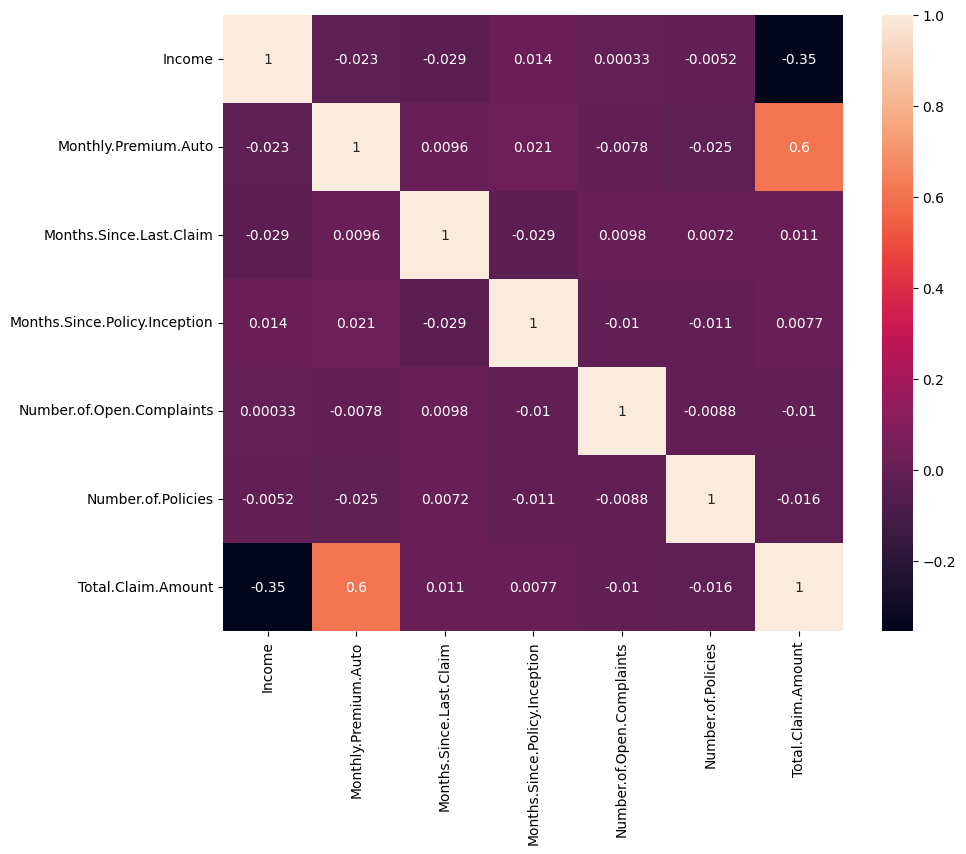

In [139]:
plt.figure(figsize=(10,8))
sns.heatmap(x_train.corr(),annot=True)

In [140]:
# seems there is no good correlation between the independnet variables and dependent variable.

In [ ]:
# lets do PCA on this data and see the results

In [141]:
from sklearn.decomposition import PCA
pc = PCA()

In [142]:
pc.fit(x_train_dummified)

PCA()

In [143]:
print("Eigen values:",pc.explained_variance_)
print("Eigen vectors:",pc.components_)

Eigen values: [7.89678553e+02 9.98185531e+01 5.68564213e+00 2.03314853e+00
 1.26828614e+00 7.41994939e-01 4.79626499e-01 4.57798900e-01
 3.87796334e-01 3.71776354e-01 3.40083587e-01 3.28426666e-01
 3.07570991e-01 3.00131426e-01 2.88645500e-01 2.79188957e-01
 2.79064452e-01 2.42827768e-01 2.15036962e-01 1.99126248e-01
 1.92641185e-01 1.75401825e-01 1.60075920e-01 1.53075172e-01
 1.51586137e-01 1.26324520e-01 1.17517499e-01 1.00315681e-01
 9.58238884e-02 9.42098077e-02 8.69663369e-02 8.40568041e-02
 7.86863646e-02 7.04257028e-02 5.56797077e-02 4.70879095e-02
 4.57703781e-02 4.28103609e-02 3.05585471e-02 1.86909460e-02
 1.72284895e-02 9.28261369e-03 7.17558364e-03 7.01693631e-03
 1.19983780e-03 1.55736634e-28 5.56097667e-30 5.56097667e-30
 5.56097667e-30 5.56097667e-30 5.56097667e-30 5.56097667e-30
 5.56097667e-30 5.56097667e-30 5.56097667e-30 5.56097667e-30]
Eigen vectors: [[ 5.18265927e-04  7.63589957e-04 -1.16354172e-02 ...  2.09383373e-04
  -3.54870086e-04  1.45486713e-04]
 [-2.917404

In [144]:
np.cumsum(pc.explained_variance_ratio_)

array([0.87192469, 0.98213949, 0.9884173 , 0.9906622 , 0.99206258,
       0.99288186, 0.99341144, 0.99391692, 0.9943451 , 0.9947556 ,
       0.9951311 , 0.99549374, 0.99583334, 0.99616473, 0.99648344,
       0.99679171, 0.99709984, 0.99736796, 0.99760539, 0.99782525,
       0.99803796, 0.99823163, 0.99840838, 0.9985774 , 0.99874477,
       0.99888425, 0.99901401, 0.99912477, 0.99923058, 0.9993346 ,
       0.99943062, 0.99952343, 0.99961032, 0.99968808, 0.99974955,
       0.99980155, 0.99985208, 0.99989935, 0.99993309, 0.99995373,
       0.99997276, 0.999983  , 0.99999093, 0.99999868, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

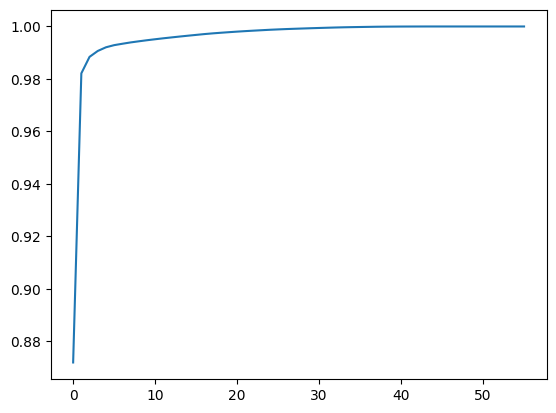

In [145]:
# visualizing the cumulative frequency
import numpy as np
from matplotlib import pyplot as plt
plt.plot(np.cumsum(pc.explained_variance_ratio_))

In [149]:
# here we select the no of components as 2 (we have to mention it on pca())
pc1 = PCA(n_components=4)

# if we didn't give the number of columns then it will take all the  columns (then there is no using all this)

# the we have to fit and trasnform the data columns 
# (transorming the data of other columns into the columns using linearequations generated by the pca)
train_pca= pc1.fit(x_train_dummified).transform(x_train_dummified) 


In [150]:
test_pca= pc1.transform(x_test_dummified)

In [151]:
model_rfr2=RandomForestRegressor()
model_rfr2.fit(train_pca,y_train)
test_preds_rfr2=model_rfr2.predict(test_pca)

print(r2_score(y_test[['Customer.Lifetime.Value']],test_preds_rfr2))
print(mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_rfr2))


0.556371949367876
0.4273592430385354


In [152]:
y_test[['Customer.Lifetime.Value']][0:5]

,Customer.Lifetime.Value
3920,2.037582
7244,-0.337636
4911,1.198116
1258,-0.452990
2923,-0.802178


In [153]:
test_preds_rfr2[0:5]

array([ 1.09284913, -0.3815103 ,  3.14712144, -0.21173522, -0.59918339])

### predicting for the test dataset with Random forest

In [164]:
test_dataset=pd.read_csv("test-1574429501088.csv")
drop_unwanted(test_dataset)
type_conversion(test_dataset)
test_dataset[numerical_cols]=si.transform(test_dataset[numerical_cols])
# y_test[['Customer.Lifetime.Value']]=sii.transform(y_test[['Customer.Lifetime.Value']])
test_dataset[categorical_cols]=sic.transform(test_dataset[categorical_cols])

test_dataset[numerical_cols]=scaler.transform(test_dataset[numerical_cols])

# y_test[['Customer.Lifetime.Value']]=scaler_y.transform(y_test[['Customer.Lifetime.Value']])

oe_test_dataset=pd.DataFrame(oe.transform(test_dataset[['Coverage','Education','EmploymentStatus','Gender','Location.Code','Marital.Status','Policy.Type', 'Policy', 'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class','Vehicle.Size']]).toarray(),columns=oe.get_feature_names_out())

oe_test_dataset.set_index(test_dataset.index,inplace=True)

test_dataset[ordinal_cols]=ordinal.transform(test_dataset[ordinal_cols])
x_test_dataset_dummified=pd.concat([test_dataset,oe_test_dataset],axis=1)
x_test_dataset_dummified.drop(['Coverage','Education','EmploymentStatus','Gender','Location.Code','Marital.Status','Policy.Type', 'Policy', 'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class','Vehicle.Size'],axis=1,inplace=True)

In [165]:
test_preds_rfr_test_dataset=model_grid_rfr.predict(x_test_dataset_dummified)

In [ ]:
# here are our results for our test datset using random forest regressor (grid search cv with best parameters)

# with 0.33 root mean squared error.